# Mulitple Linear Regression
## Problem Statement
BoomBikes, a US bike-sharing provider, has experienced significant revenue declines due to the ongoing COVID-19 pandemic. The company is struggling to stay afloat in the current market conditions. To address this, they are planning a strategic business initiative to boost revenue once the lockdown ends and the economy recovers.

To achieve this, BoomBikes has hired a consulting firm to analyze the factors influencing the demand for shared bikes in the American market. They aim to identify:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning and statistical tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## 1. Reading and Understanding Data

In [2]:
# Loading the loan data and converting into dataframe
bike_df = pd.read_csv('day.csv')

In [3]:
#reading the data
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
bike_df.shape #checking the size of the data 
# Dataset has 730 rows and 16 columns

(730, 16)

In [5]:
bike_df.info() #checking out for detailed info about the dataset
#Checking for count and the type of data present in the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Here data looks with in the permissiable range.
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df.size #describes the total size of the dataset

11680

## 2. Data Cleaning

In [8]:
# To check if there is any headers/footers or summary details rows are there and delete it.
bike_df.head() # summary about the loan Data
print(bike_df.shape)
bike_df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike_df.tail() # checking if total, subtotal rows present
print(bike_df.shape)
bike_df.tail()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [10]:
# From above analysis We can see that there is no header/footers/summary/subtotal rows
# Also number of rows is 730 and columns is 16.

In [11]:
# To check if there is any null values.

In [12]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# We can see that there is no null values present in data.

### Eliminate columns that are not useful for data analysis
- Remove ‘instant’ as it merely serves as the record index.
- Discard ‘dteday’ since date characteristics such as ‘yr’, ‘month’, and ‘weekday’ are already included.
- Exclude ‘casual’ and ‘registered’ because their combined total is represented by ‘cnt’.

In [14]:
print("Total columns with values NA: ", len(bike_df.columns[bike_df.isna().all()].tolist()))

Total columns with values NA:  0


In [15]:
 #Lets delete all the columns which value is uniqe in nature.

unique_columns = [col for col in bike_df.columns if bike_df[col].nunique() == len(bike_df)]
unique_columns

['instant', 'dteday']

In [16]:
dropped_columns=['instant','dteday']
bike_df.drop(dropped_columns,axis=1,inplace=True)

#Removing casual and registered as cnt is sum of these
bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)

bike_df.shape


(730, 12)

### Checking  if there any duplicates row. 

In [17]:
duplicate_rows = len(bike_df[bike_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


No duplicate rows found.

### Handling outliers

In [18]:
bike_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

so there are no any more columns with unique values.

#### Inferences:
We can see that values are within the ranges. So need to remove any outliers.

In [19]:
# From data dictionary and above analysis we can say that  season, weathersit & month are categorical values but the values are int.
#Lets Convert season, weathersit & month to Category type
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 54.3 KB


In [20]:
# As per data dictionary, following are the categorical variables has following values.
# 1. yr has two values 0 for 2018 and 1 for 2019.
# 2. holiday o or 1.
# 3. working day 0 or 1.
# 4. weathersit has three values good, bad and moderate weatherSit. 
# 5. season (1:spring, 2:summer, 3:fall, 4:winter)
# all the data seems to be in range

In [21]:
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## 3. EDA
### Univariate analysis

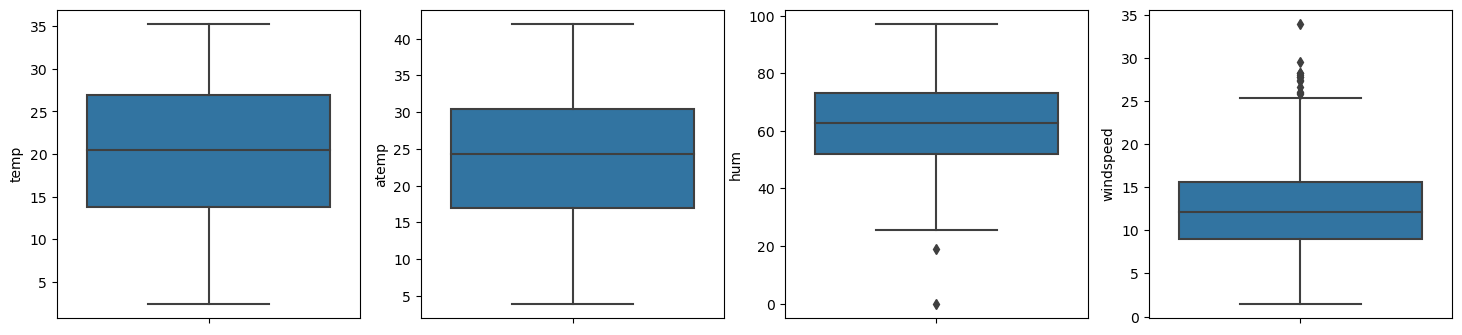

In [22]:
# Lets check if any outliers present is numeric.
# raw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=bike_df)
    k+=1

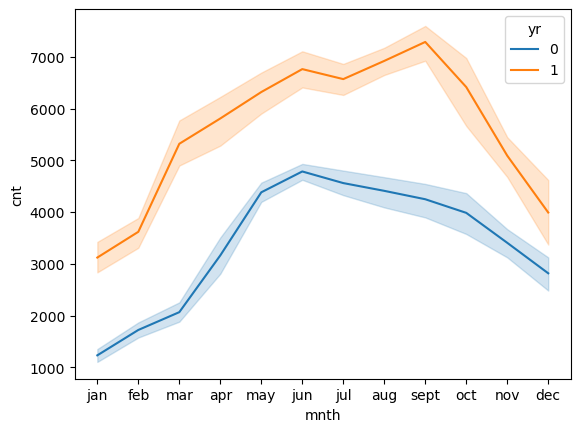

In [23]:
# Line graph will show the count for each month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=bike_df,hue = "yr")
plt.show() 

#### Inferences:
1. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.
2. Demand for bike is high between may to oct for year 2018 and 2019.
3. From Boxchart we can also see that there is no outliers present.

### Drawing pairplots to check for linear relationship

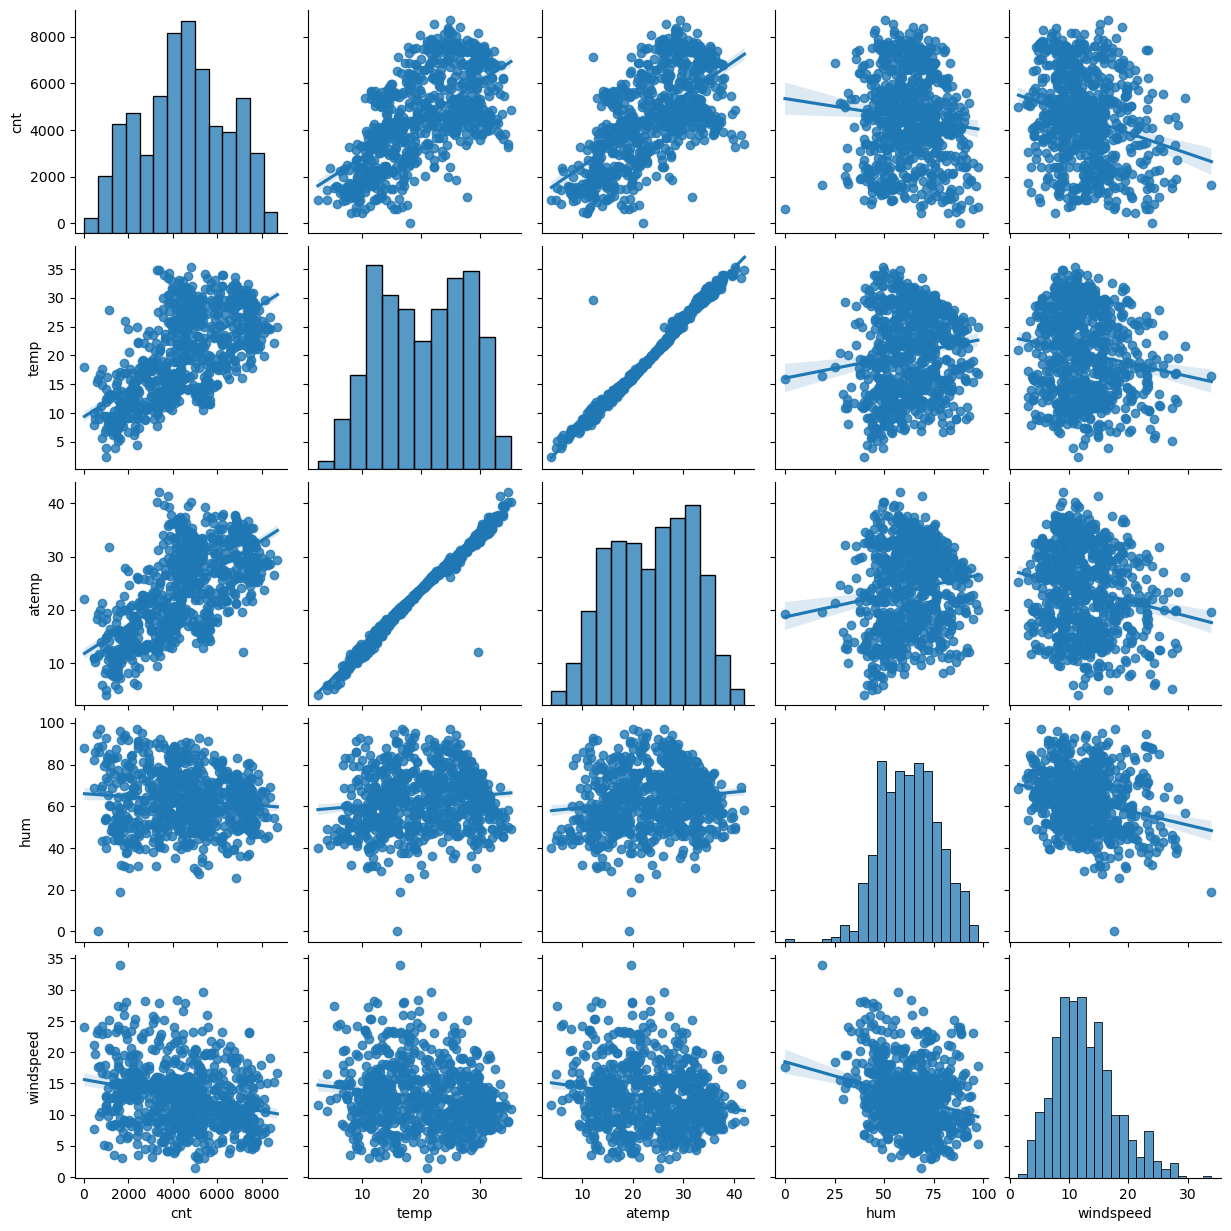

In [24]:
# Let’s create pair plots to better visualize the potential linear dependencies between the ‘cnt’ (count of total rentals) and the independent variables.
numerical_variables=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=bike_df,vars=numerical_variables, kind="reg")
plt.show()

#### Inferences:
1. We can see that we have linealy dependecy between temp, atemp and count.
2. we can also see that temp and atemp is highly correlated.

###  Bivariate analysis
Barcharts for categorical variables to see demands

In [25]:
# function to create barplot related to categorical columns

def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike_df)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike_df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

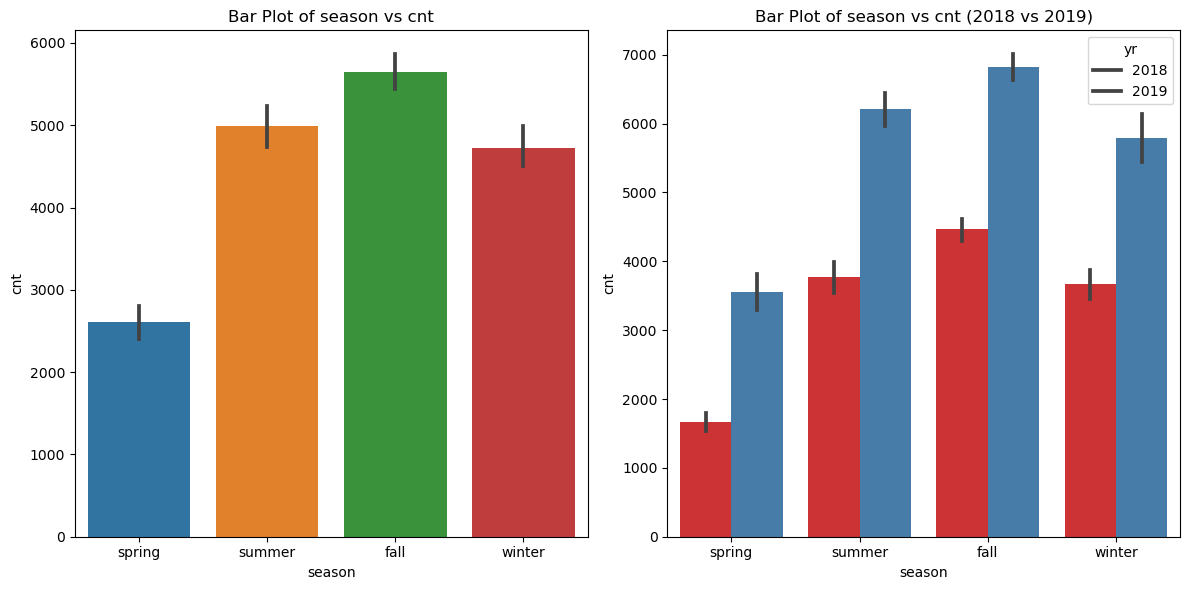

In [26]:
plot_bar_graphs('season')

#### Inferences:
1. Fall  seasons is having high number bike rental.
2. Bike rental in 2019 has increaded for every seasion compared to 2018.

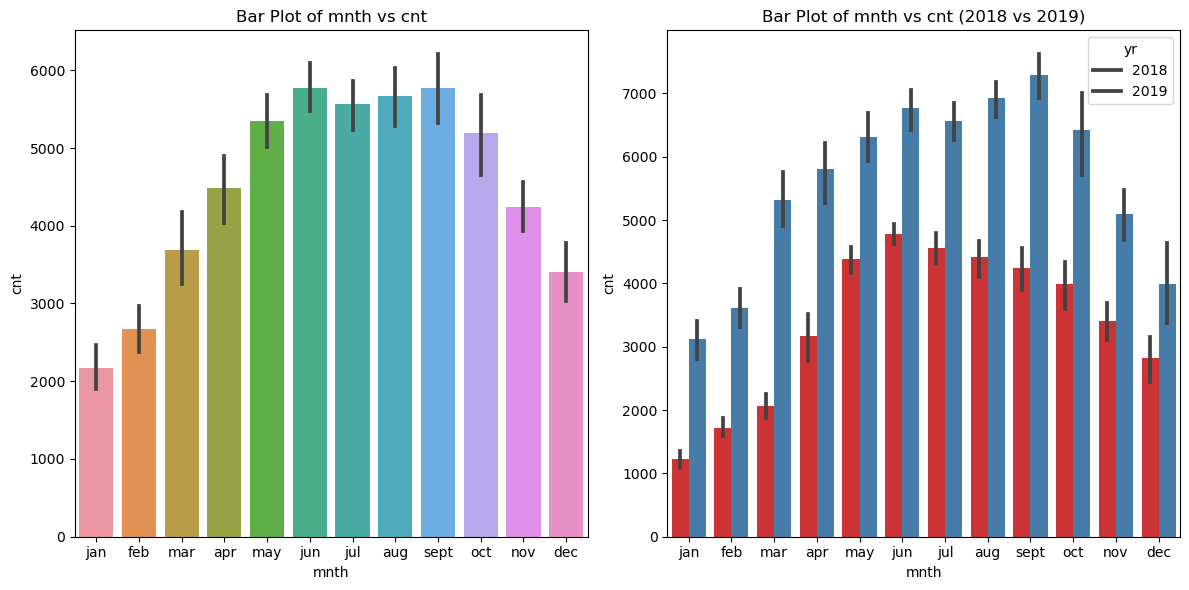

In [27]:
plot_bar_graphs('mnth')

#### Inferences:
1. May to oct is having number of bike registration.
2. Bike registration in 2019 has increaded for every month compared to 2018.

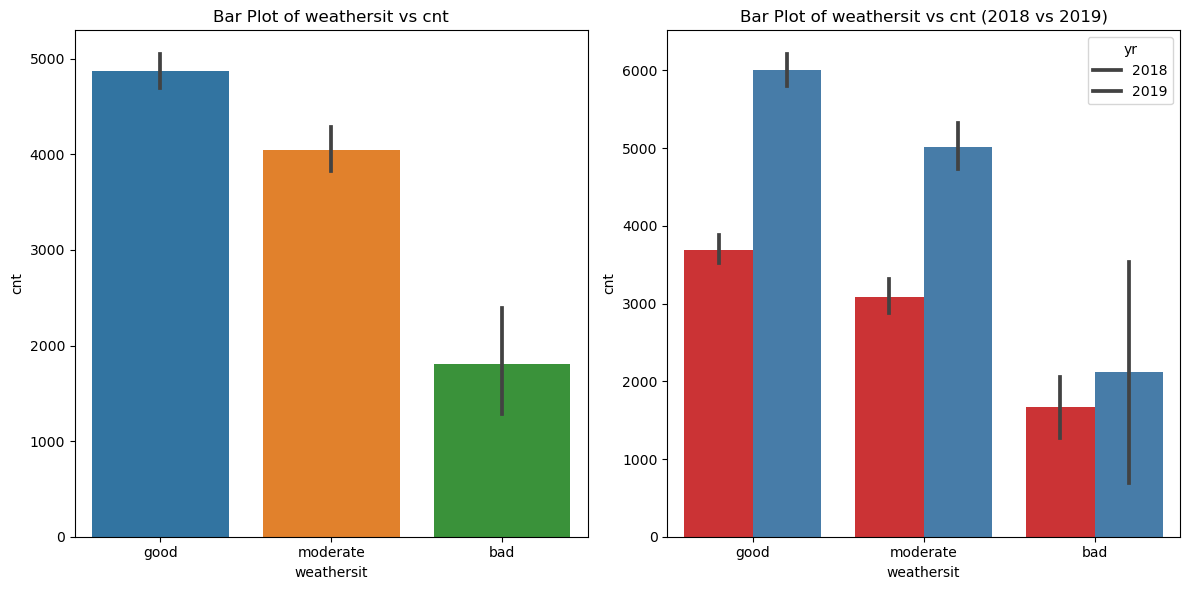

In [28]:
plot_bar_graphs('weathersit')

#### Inferences:
1. People prefer bike rental when weather situations is good. 
2. Bike registration in 2019 has increaded for every weather situtation 2018.

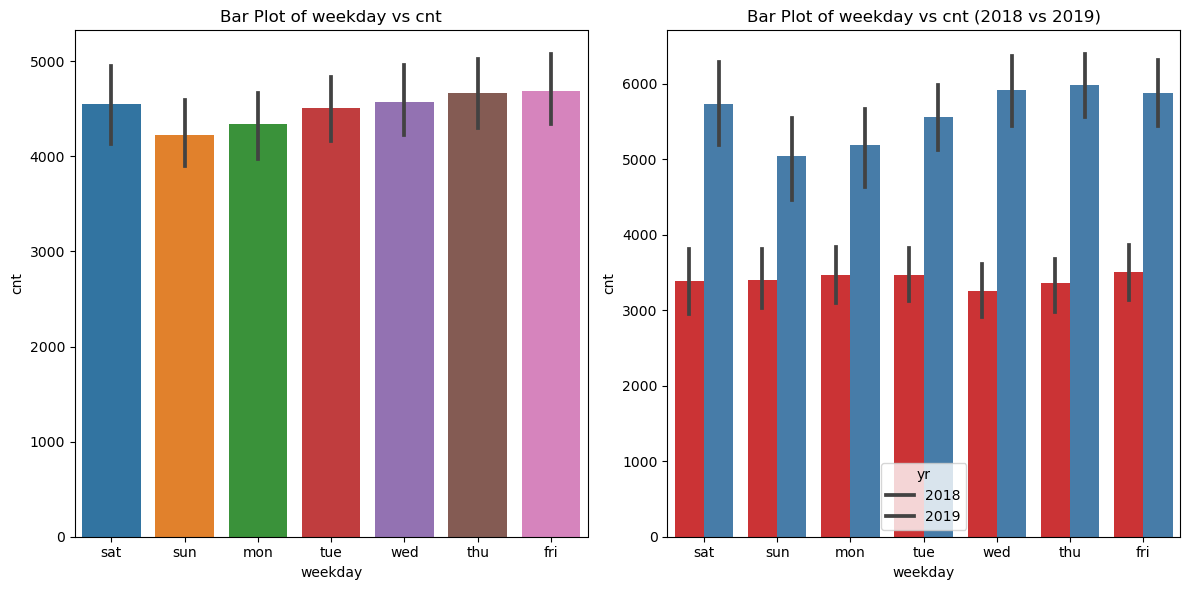

In [29]:
plot_bar_graphs('weekday')

#### Inferences:
1. People don't prefer bike rental on weekends. 

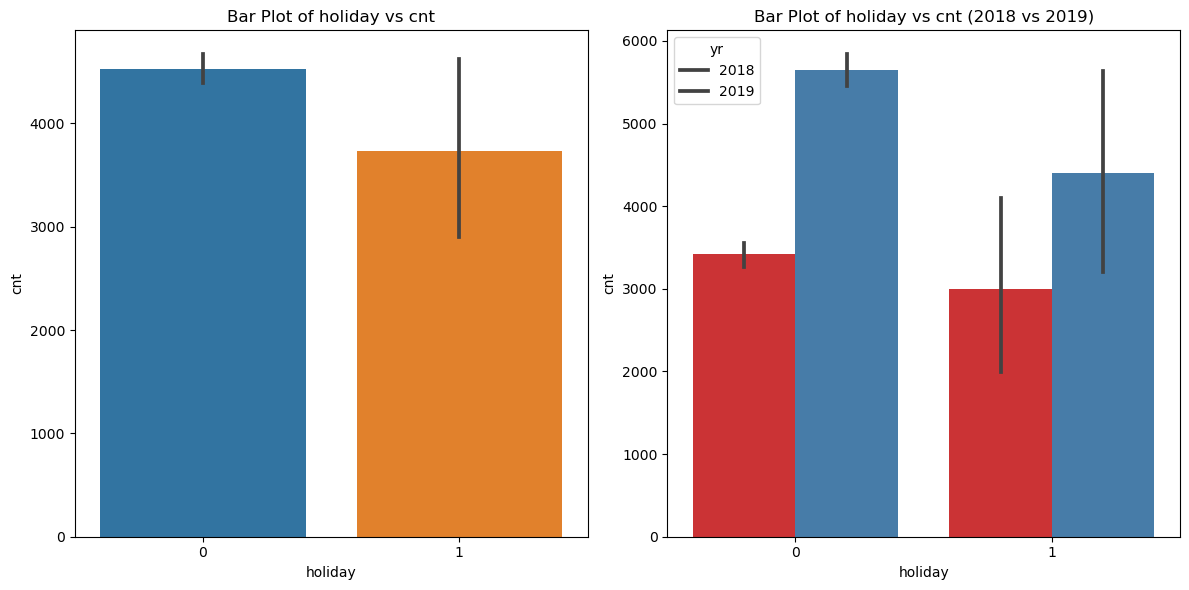

In [30]:
plot_bar_graphs('holiday')

#### Inferences:
1. People dont prefer renting bike holiday.

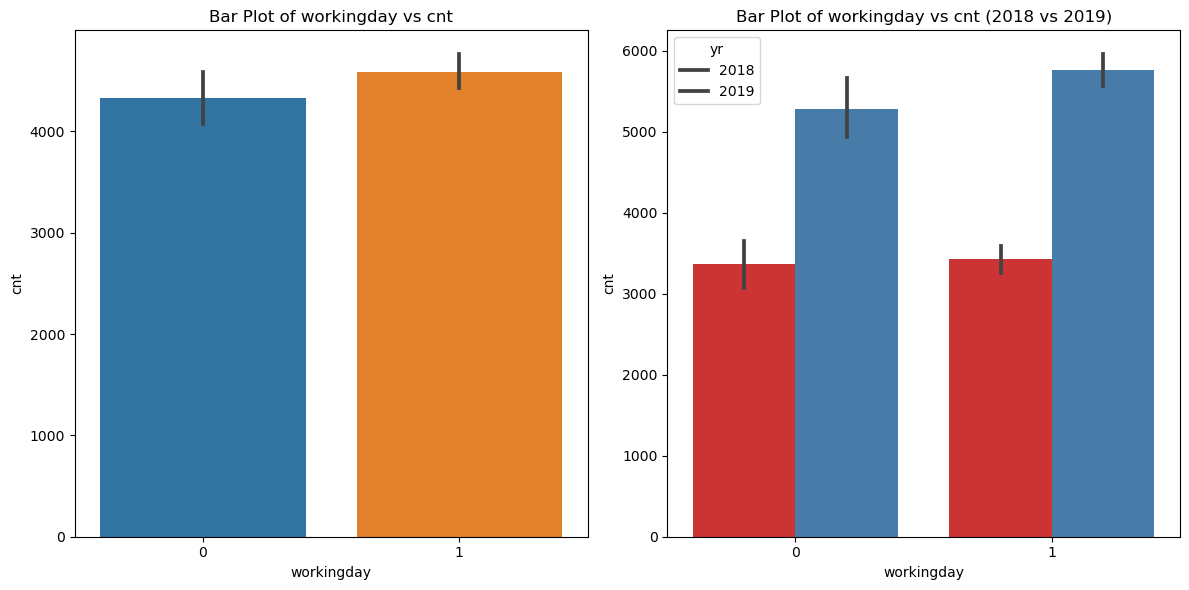

In [31]:
plot_bar_graphs('workingday')

#### Inferences:
1. People prefer bike rental on working days.

### Heatmap for correlation between numeric variables

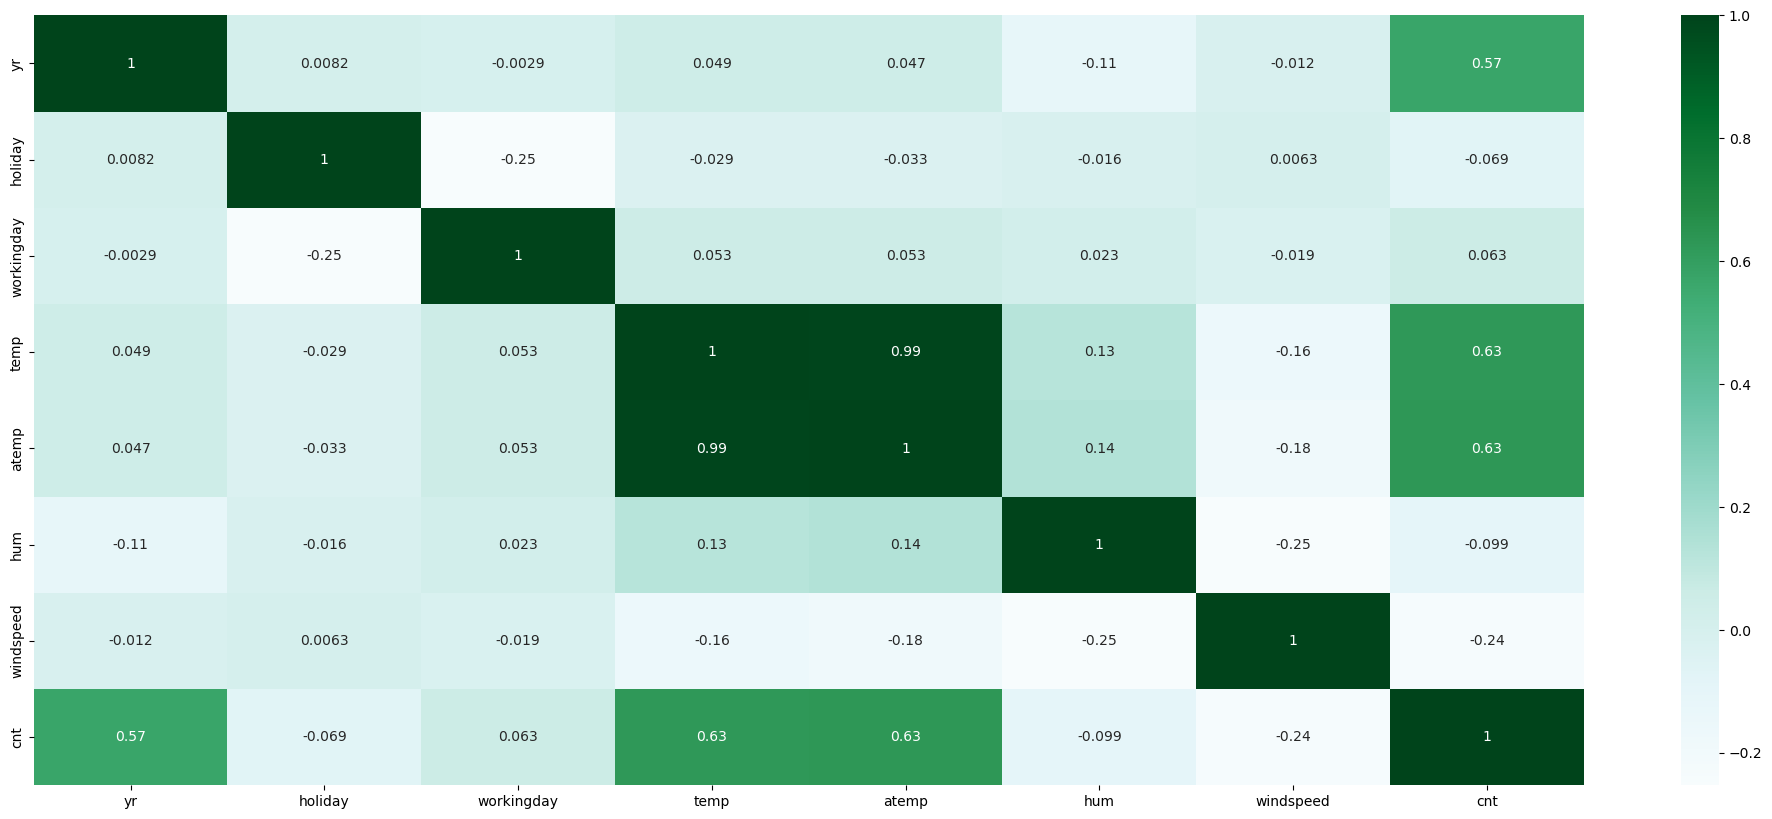

In [32]:
# Filter out non-numeric columns
numeric_df = bike_df.select_dtypes(include=[np.number])

# Lets plot the corrlation matrix(heatmap)
plt.figure(figsize=(25, 10))
sns.heatmap(numeric_df.corr(), cmap='BuGn', annot=True)
plt.show()

#### Inferences from heatmap: 
1. Since Count is sum of casual and registed. That we can infer from  heatmap as casual and registered are highly correleted with cnt. 
2. holiday, hum, and windspeed is negatively correlated. 
3. Indepedent variable temp and atemp is highly correlated(0.99).This show that there is high possiblity that one may have derived from another,One of the them can be dropped. Will use VIP and p values to drop this.

In [33]:
bike_df.shape

(730, 12)

<Axes: xlabel='weathersit', ylabel='cnt'>

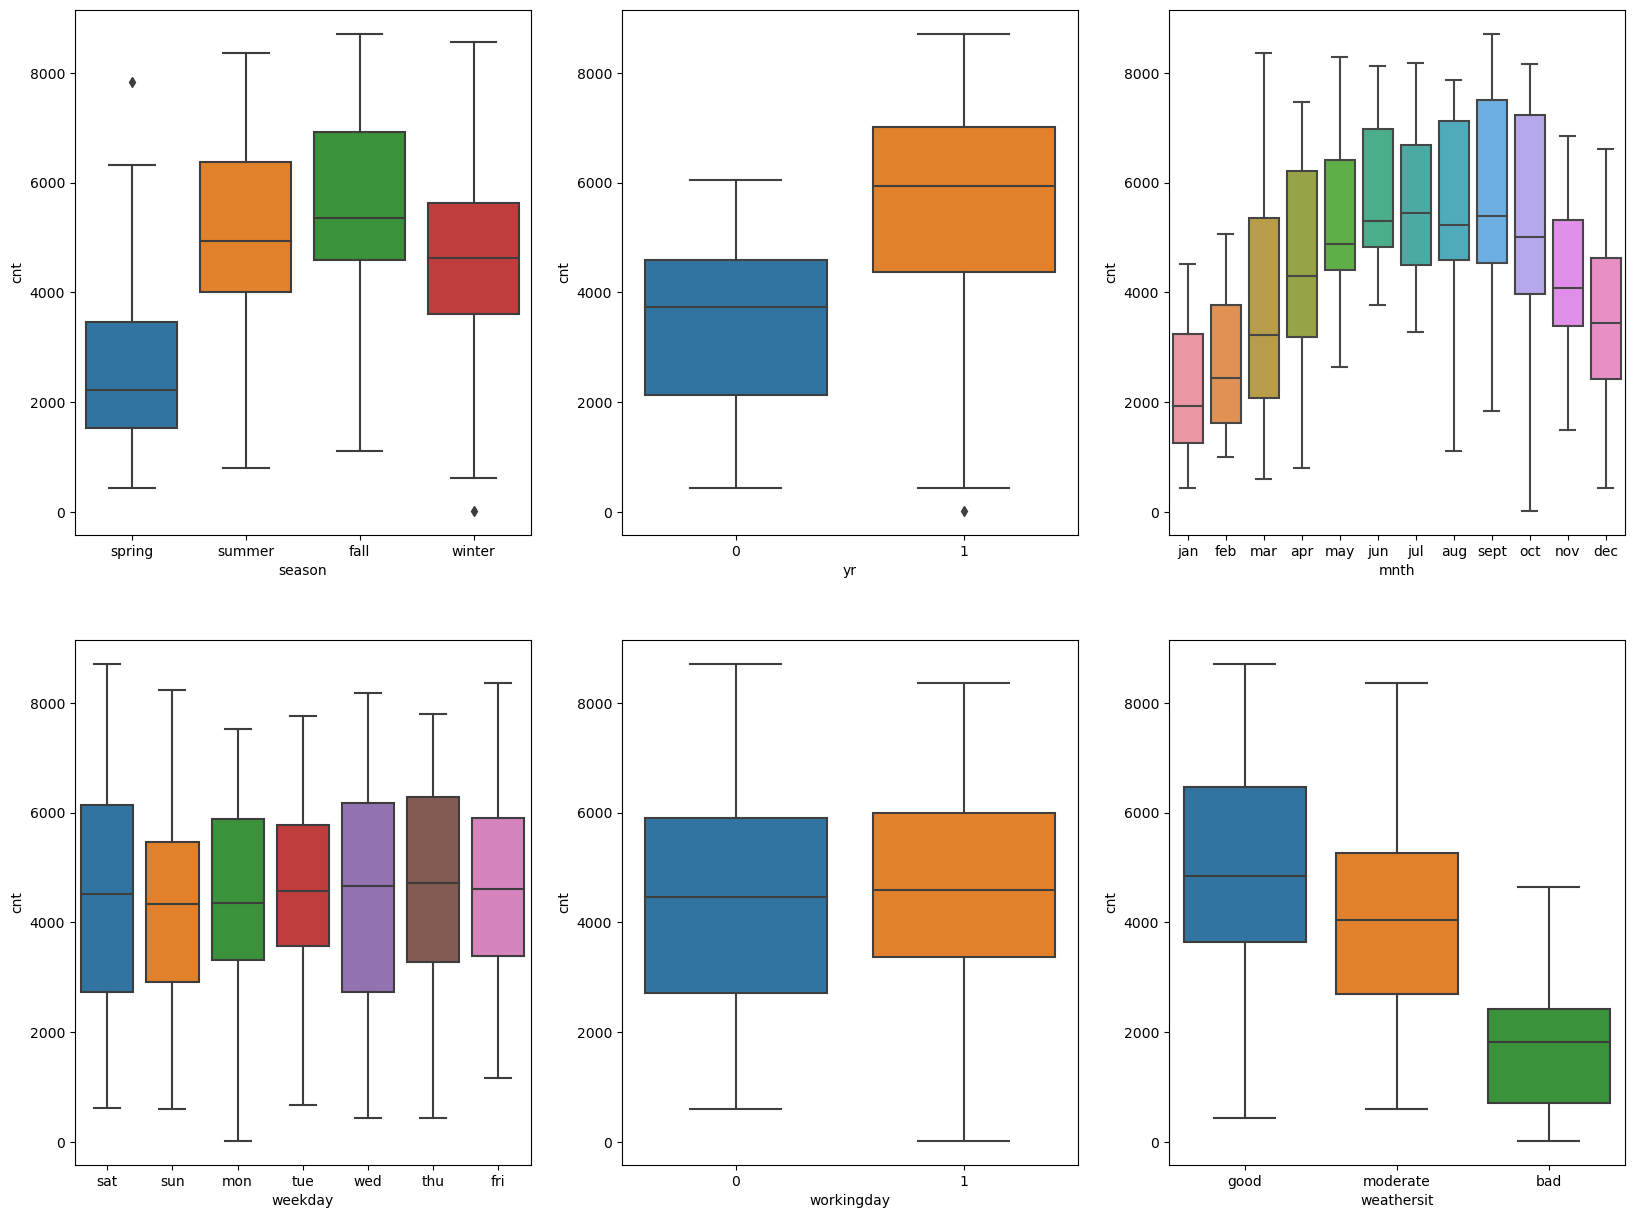

In [34]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

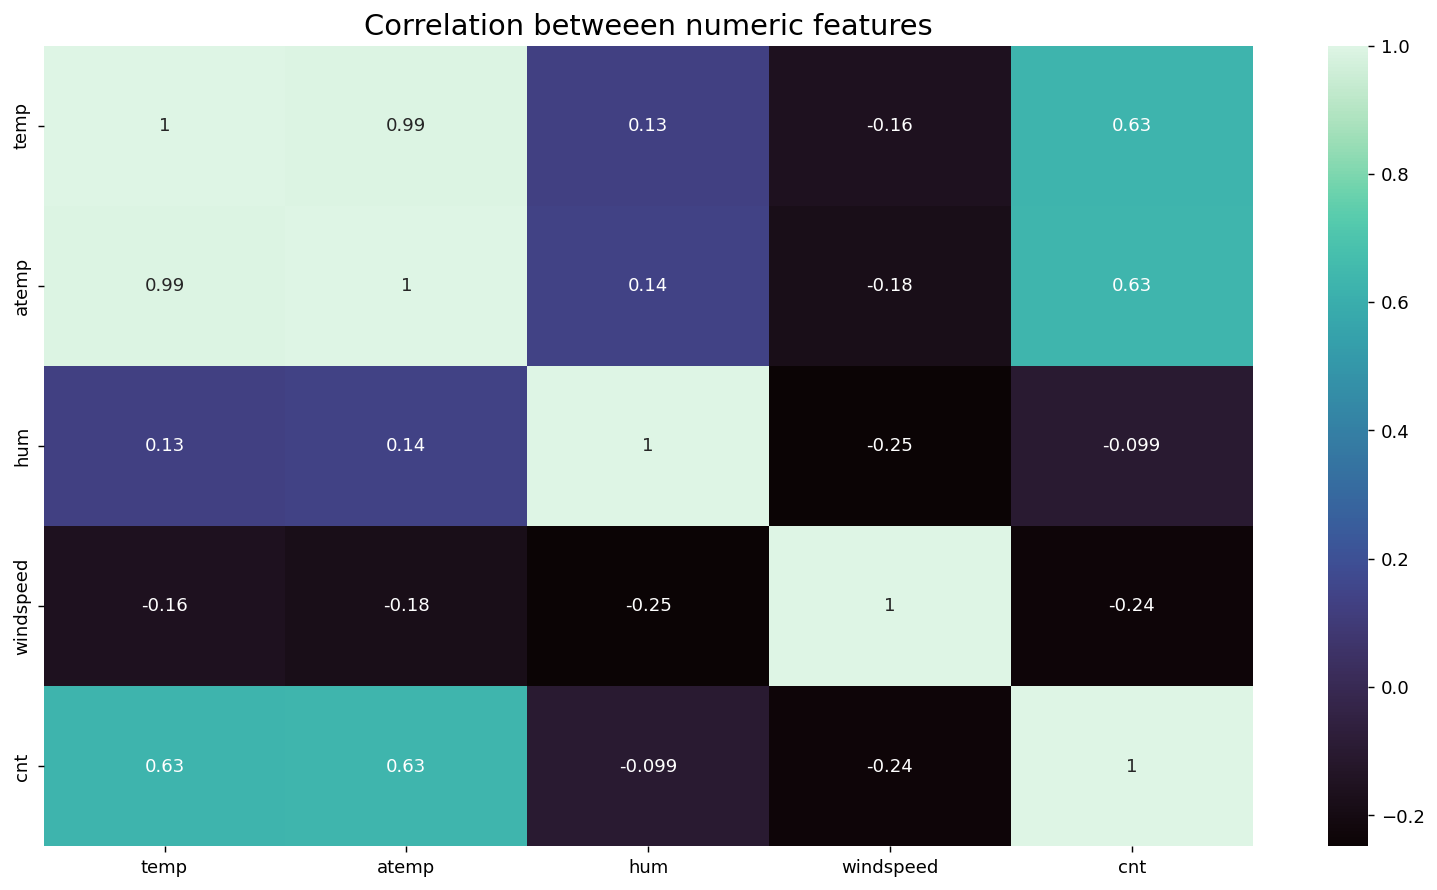

In [35]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [36]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 4. Data preparation for linear regression
Creating dummy variables for categorical variables

In [37]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


#### Creating dummy variables for catogorical variables.

In [38]:
# we need to create a dummy variables for four categorical variables. mnth', 'weekday', 'season' & 'weathersit

In [39]:
bike_df = pd.get_dummies(bike_df, drop_first=True)

In [40]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
# Divide the train and test data
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.75, test_size=0.25, random_state=100)

In [42]:
bike_df_train.shape


(547, 30)

In [43]:
bike_df_test.shape

(183, 30)

#### Scaling numeric variables 

In [44]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler=MinMaxScaler()

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [45]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,False,False,...,True,False,False,False,False,False,True,False,False,False
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,True,False,...,False,False,False,False,False,False,False,False,False,False
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,False,False,...,False,False,False,False,False,False,True,False,True,False
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,False,False,...,False,False,False,True,False,False,False,False,False,False
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,False,True,...,False,False,False,False,True,False,False,False,False,False


In [46]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# From above analysis we can see that numeric variabels has scaled between 0 and 1.


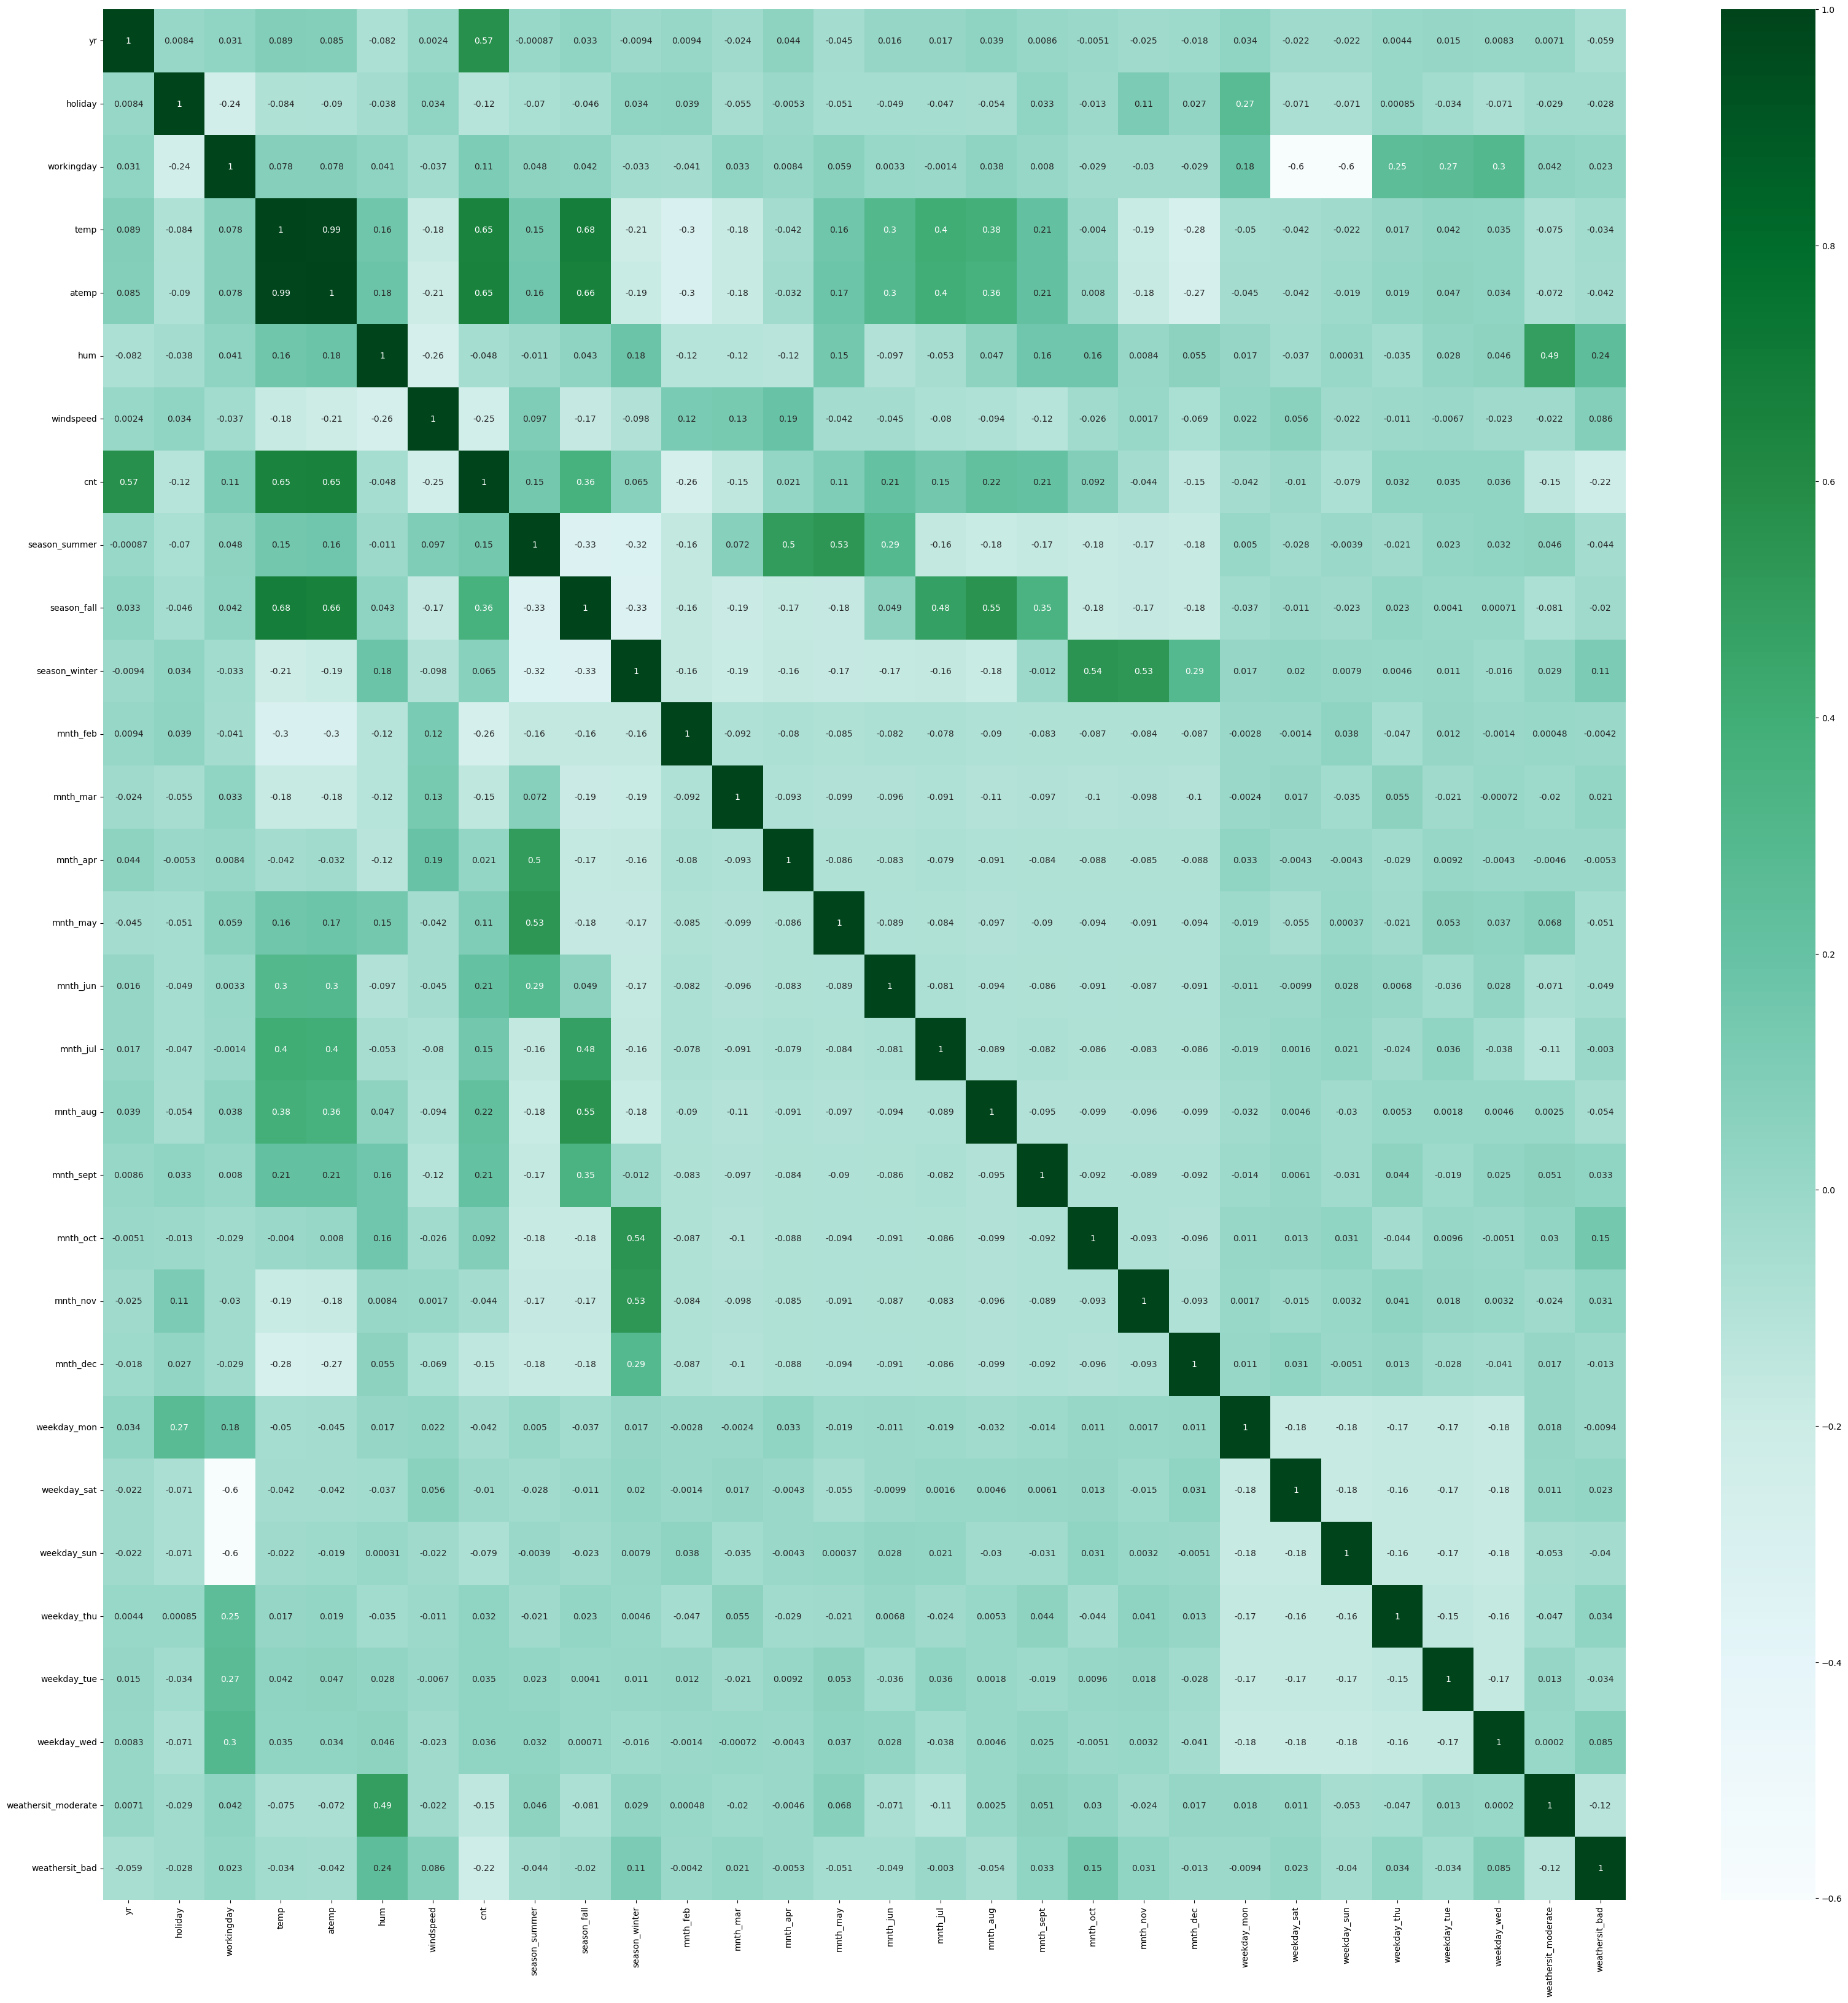

In [48]:
# Plotting a correlation matrix
plt.figure(figsize = (40, 40))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="BuGn")
plt.show()

In [49]:
# poping seperating independent and dependent variables
y_train=bike_df_train.pop('cnt')
X_train=bike_df_train


## 4. Build a Model

####  Model #1 

In [50]:
import pandas as pd
import statsmodels.api as sm

# Ensure all columns in X_train are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to integers
for col in X_train.select_dtypes(include=['bool']).columns:
    X_train[col] = X_train[col].astype(int)

# Ensure y_train is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Check for NaN values and remove them
print("Missing values in X_train before dropna:\n", X_train.isnull().sum())
print("Missing values in y_train before dropna:\n", y_train.isnull().sum())

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

print("Missing values in X_train after dropna:\n", X_train.isnull().sum())
print("Missing values in y_train after dropna:\n", y_train.isnull().sum())

# Check data types
print("Data types of X_train:\n", X_train.dtypes)
print("Data types of y_train:\n", y_train.dtypes)

# Check first few rows to confirm
print("First few rows of X_train:\n", X_train.head())
print("First few rows of y_train:\n", y_train.head())

# Add constant to the model
X_train_lm = sm.add_constant(X_train)

# Fit the model
lr1 = sm.OLS(y_train, X_train_lm).fit()

# Print model parameters
print(lr1.params)

Missing values in X_train before dropna:
 yr                     0
holiday                0
workingday             0
temp                   0
atemp                  0
hum                    0
windspeed              0
season_summer          0
season_fall            0
season_winter          0
mnth_feb               0
mnth_mar               0
mnth_apr               0
mnth_may               0
mnth_jun               0
mnth_jul               0
mnth_aug               0
mnth_sept              0
mnth_oct               0
mnth_nov               0
mnth_dec               0
weekday_mon            0
weekday_sat            0
weekday_sun            0
weekday_thu            0
weekday_tue            0
weekday_wed            0
weathersit_moderate    0
weathersit_bad         0
dtype: int64
Missing values in y_train before dropna:
 0
Missing values in X_train after dropna:
 yr                     0
holiday                0
workingday             0
temp                   0
atemp                  0
hum       

In [51]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          4.86e-198
Time:                        09:04:19   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1504      0.022      6.709      0.000       0.106       0.194
yr                      0.2308      0.008     30.023      0.000       0.216       0.246
holiday                -0.0226      0.021     -1.067      0.287      -0.064       0.019
workingday              0.0788      0.010      7.746      0.000       0.059       0.099
temp                    0.3916      0.138      2.838      0.005       0.121       0.663
atemp                   0.0547      0.136      0.404      0.686      -0.211       0.321
hum                    -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed              -0.1773      0.025     -7.069      0.000      -0.227      -0.128
season_summer           0.0960      0.023      4.210      0.000       0.051       0.141
season_fall             0.0519      0.028      1.828      0.068      -0.004       0.108
season_winter           0.1661      0.024      7.001      0.000       0.119       0.213
mnth_feb                0.0277      0.019      1.449      0.148      -0.010       0.065
mnth_mar                0.0607      0.021      2.880      0.004       0.019       0.102
mnth_apr                0.0554      0.032      1.720      0.086      -0.008       0.119
mnth_may                0.0768      0.035      2.222      0.027       0.009       0.145
mnth_jun                0.0689      0.037      1.878      0.061      -0.003       0.141
mnth_jul                0.0247      0.042      0.595      0.552      -0.057       0.106
mnth_aug                0.0794      0.039      2.010      0.045       0.002       0.157
mnth_sept               0.1419      0.035      4.045      0.000       0.073       0.211
mnth_oct                0.0650      0.032      2.052      0.041       0.003       0.127
mnth_nov                0.0117      0.030      0.387      0.699      -0.048       0.071
mnth_dec                0.0054      0.024      0.227      0.821      -0.041       0.052
weekday_mon            -0.0233      0.015     -1.582      0.114      -0.052       0.006
weekday_sat             0.0741      0.012      6.386      0.000       0.051       0.097
weekday_sun             0.0200      0.012      1.688      0.092      -0.003       0.043
weekday_thu            -0.0106      0.015     -0.707      0.480      -0.040       0.019
weekday_tue            -0.0219      0.015     -1.474      0.141      -0.051       0.007
weekday_wed            -0.0086      0.015     -0.596      0.551      -0.037       0.020
weathersit_moderate    -0.0598      0.010     -6.002      0.000      -0.079      -0.040
weathersit_bad         -0.2595      0.026     -9.971      0.000      -0.311      -0.208
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):       

In [52]:
# Here, we can see that all adjusted R-Squire is 0.848 is pretty good.Lets us see if we can reduce the independet features

In [53]:
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to elimnate insignifiance variable.

In [54]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 5),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 4),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_dec', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [57]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat', 'weathersit_moderate',
       'weathersit_bad'],
      dtype='object')

In [58]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [59]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]


In [60]:
 #Model#2 

In [61]:
# Generic function to calculate VIF of variables

def calculateVIF(bike_df):
    vif = pd.DataFrame()
    vif['Features'] = bike_df.columns
    vif['VIF'] = [variance_inflation_factor(bike_df.values, i) for i in range(bike_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [62]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,23.47
4,hum,16.96
7,season_fall,7.77
2,workingday,4.89
5,windspeed,3.89
6,season_summer,3.44
8,season_winter,2.85
13,weathersit_moderate,2.15
0,yr,2.04
9,mnth_aug,1.87


In [63]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.5
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          7.90e-209
Time:                        09:04:20   Log-Likelihood:                 562.51
No. Observations:                 547   AIC:                            -1093.
Df Residuals:                     531   BIC:                            -1024.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1905      0.027      6.995      0.000       0.137       0.244
yr                      0.2282      0.008     29.882      0.000       0.213       0.243
holiday                -0.0711      0.025     -2.864      0.004      -0.120      -0.022
workingday              0.0458      0.011      4.261      0.000       0.025       0.067
temp                    0.4978      0.032     15.651      0.000       0.435       0.560
hum                    -0.1644      0.036     -4.578      0.000      -0.235      -0.094
windspeed              -0.1786      0.024     -7.394      0.000      -0.226      -0.131
season_summer           0.1226      0.014      8.699      0.000       0.095       0.150
season_fall             0.0336      0.021      1.611      0.108      -0.007       0.075
season_winter           0.1484      0.013     11.562      0.000       0.123       0.174
mnth_aug                0.0470      0.017      2.789      0.005       0.014       0.080
mnth_sept               0.1167      0.016      7.098      0.000       0.084       0.149
mnth_oct                0.0472      0.017      2.858      0.004       0.015       0.080
weekday_sat             0.0532      0.014      3.879      0.000       0.026       0.080
weathersit_moderate    -0.0580      0.010     -5.849      0.000      -0.077      -0.038
weathersit_bad         -0.2538      0.026     -9.869      0.000      -0.304      -0.203
==============================================================================
Omnibus:                       83.546   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.343
Skew:                          -0.756   Prob(JB):                     4.30e-50
Kurtosis:                       5.773   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# From abvoe analysis all the variables is having low p-values and also adjusted-R-squire value is 0.847 which is been
# increased from 0.843 to 0.847 after droping 14 features, this means most of the features were insignifiance and few were negative collrelatin
# from above VIP table we can see that workingday is having 31.53 vip value which is quite high. lets remove this featues.


In [65]:
X_train_rfe2 = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,0,0,1,0,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,1,0,0
253,0,0,0.740406,0.735509,0.156398,0,1,0,0,1,0,0,0,0


In [66]:
calculateVIF(X_train_rfe2)

,Features,VIF
2,temp,23.26
3,hum,15.08
6,season_fall,7.77
4,windspeed,3.70
5,season_summer,3.44
7,season_winter,2.85
12,weathersit_moderate,2.14
0,yr,2.02
8,mnth_aug,1.87
10,mnth_oct,1.67


In [67]:
# Model 3 
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          3.88e-206
Time:                        09:04:20   Log-Likelihood:                 553.31
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     532   BIC:                            -1012.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2284      0.026      8.738      0.000       0.177       0.280
yr                      0.2288      0.008     29.493      0.000       0.214       0.244
holiday                -0.1078      0.024     -4.561      0.000      -0.154      -0.061
temp                    0.5020      0.032     15.542      0.000       0.439       0.565
hum                    -0.1716      0.036     -4.707      0.000      -0.243      -0.100
windspeed              -0.1785      0.025     -7.273      0.000      -0.227      -0.130
season_summer           0.1228      0.014      8.578      0.000       0.095       0.151
season_fall             0.0325      0.021      1.535      0.125      -0.009       0.074
season_winter           0.1492      0.013     11.444      0.000       0.124       0.175
mnth_aug                0.0492      0.017      2.870      0.004       0.016       0.083
mnth_sept               0.1185      0.017      7.091      0.000       0.086       0.151
mnth_oct                0.0447      0.017      2.660      0.008       0.012       0.078
weekday_sat             0.0158      0.011      1.475      0.141      -0.005       0.037
weathersit_moderate    -0.0547      0.010     -5.450      0.000      -0.074      -0.035
weathersit_bad         -0.2465      0.026     -9.456      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       81.314   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.008
Skew:                          -0.774   Prob(JB):                     1.66e-43
Kurtosis:                       5.499   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# From above we can see that weekday_sat is having high pValue 0.482>0.05  and hum VIP is 14.57>5.
# Lets drop weekday_sat

In [69]:
X_train_rfe3 = X_train_rfe2.drop(["weekday_sat"], axis = 1)
X_train_rfe3.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,0,0,1,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.735509,0.156398,0,1,0,0,1,0,0,0


In [70]:

calculateVIF(X_train_rfe3)


,Features,VIF
2,temp,23.26
3,hum,15.03
6,season_fall,7.77
4,windspeed,3.65
5,season_summer,3.44
7,season_winter,2.85
11,weathersit_moderate,2.14
0,yr,2.02
8,mnth_aug,1.87
10,mnth_oct,1.67


In [71]:
# Model 4
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.5
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          7.47e-207
Time:                        09:04:20   Log-Likelihood:                 552.19
No. Observations:                 547   AIC:                            -1076.
Df Residuals:                     533   BIC:                            -1016.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2323      0.026      8.921      0.000       0.181       0.283
yr                      0.2285      0.008     29.435      0.000       0.213       0.244
holiday                -0.1105      0.024     -4.682      0.000      -0.157      -0.064
temp                    0.5010      0.032     15.496      0.000       0.437       0.564
hum                    -0.1740      0.036     -4.773      0.000      -0.246      -0.102
windspeed              -0.1770      0.025     -7.210      0.000      -0.225      -0.129
season_summer           0.1227      0.014      8.560      0.000       0.095       0.151
season_fall             0.0327      0.021      1.540      0.124      -0.009       0.074
season_winter           0.1495      0.013     11.459      0.000       0.124       0.175
mnth_aug                0.0497      0.017      2.897      0.004       0.016       0.083
mnth_sept               0.1190      0.017      7.120      0.000       0.086       0.152
mnth_oct                0.0448      0.017      2.668      0.008       0.012       0.078
weathersit_moderate    -0.0542      0.010     -5.400      0.000      -0.074      -0.035
weathersit_bad         -0.2455      0.026     -9.409      0.000      -0.297      -0.194
==============================================================================
Omnibus:                       76.498   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.900
Skew:                          -0.716   Prob(JB):                     7.85e-43
Kurtosis:                       5.541   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# we can see that Adj. R-squire is 0.847 and pvalue is less than 0.05 for every features.
# VIP for hum is 14.57>5.so Lets frist remove the hum.


In [73]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
X_train_rfe4.head()

,yr,holiday,temp,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.057471,0,0,1,0,0,0,0,0
523,1,0,0.735215,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.156398,0,1,0,0,1,0,0,0


In [74]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,14.14
5,season_fall,7.29
4,season_summer,3.38
3,windspeed,3.25
6,season_winter,2.74
0,yr,2.02
7,mnth_aug,1.87
9,mnth_oct,1.65
8,mnth_sept,1.52
10,weathersit_moderate,1.52


In [75]:
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     232.9
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          3.20e-203
Time:                        09:04:20   Log-Likelihood:                 540.75
No. Observations:                 547   AIC:                            -1055.
Df Residuals:                     534   BIC:                            -999.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1338      0.016      8.262      0.000       0.102       0.166
yr                      0.2330      0.008     29.638      0.000       0.218       0.248
holiday                -0.1110      0.024     -4.608      0.000      -0.158      -0.064
temp                    0.4671      0.032     14.517      0.000       0.404       0.530
windspeed              -0.1435      0.024     -5.978      0.000      -0.191      -0.096
season_summer           0.1261      0.015      8.634      0.000       0.097       0.155
season_fall             0.0449      0.021      2.091      0.037       0.003       0.087
season_winter           0.1450      0.013     10.919      0.000       0.119       0.171
mnth_aug                0.0444      0.017      2.546      0.011       0.010       0.079
mnth_sept               0.1094      0.017      6.461      0.000       0.076       0.143
mnth_oct                0.0430      0.017      2.511      0.012       0.009       0.077
weathersit_moderate    -0.0818      0.008     -9.771      0.000      -0.098      -0.065
weathersit_bad         -0.2929      0.025    -11.901      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       76.941   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.045
Skew:                          -0.719   Prob(JB):                     2.69e-43
Kurtosis:                       5.557   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#From the above  Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
# So we can now fix this 

### 5. Linear Regrssion Assumptions Proofs
#### Residual Analysis

In [77]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

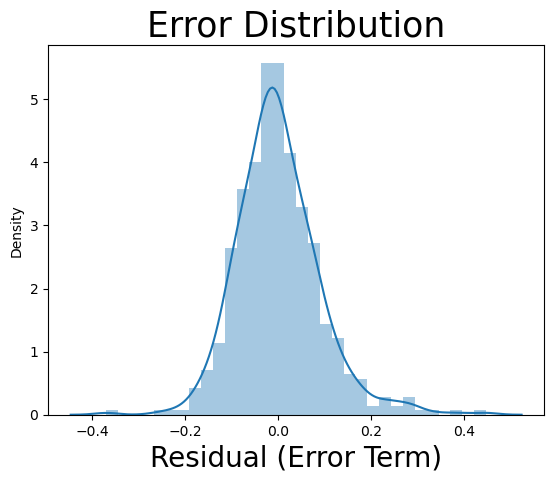

In [78]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show() 


In [79]:
#Inferences: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


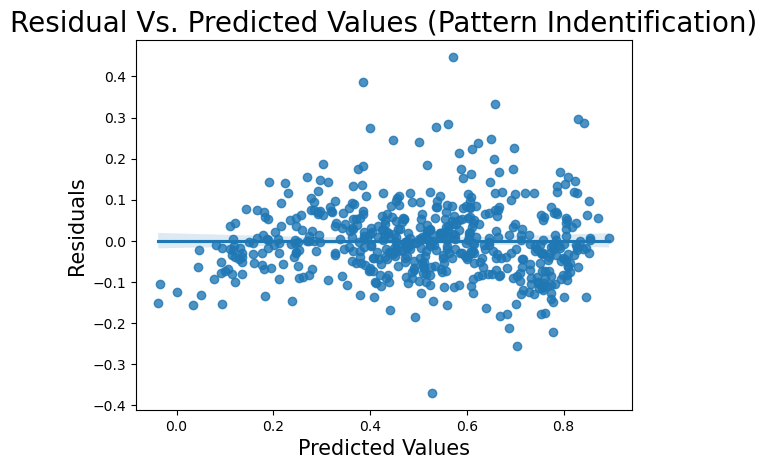

In [80]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [81]:
#From the above graph, we see that there is almost no relation between Residual & Predicted Value

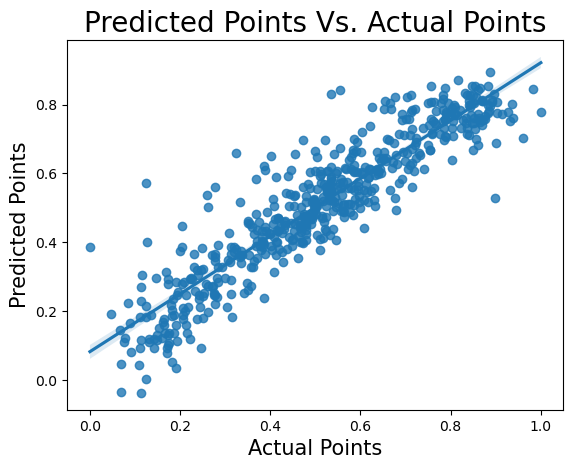

In [82]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [83]:
# we can see that variance is  similar from both end of fitted line.

In [84]:
# Multicorrelation
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,14.14
5,season_fall,7.29
4,season_summer,3.38
3,windspeed,3.25
6,season_winter,2.74
0,yr,2.02
7,mnth_aug,1.87
9,mnth_oct,1.65
8,mnth_sept,1.52
10,weathersit_moderate,1.52


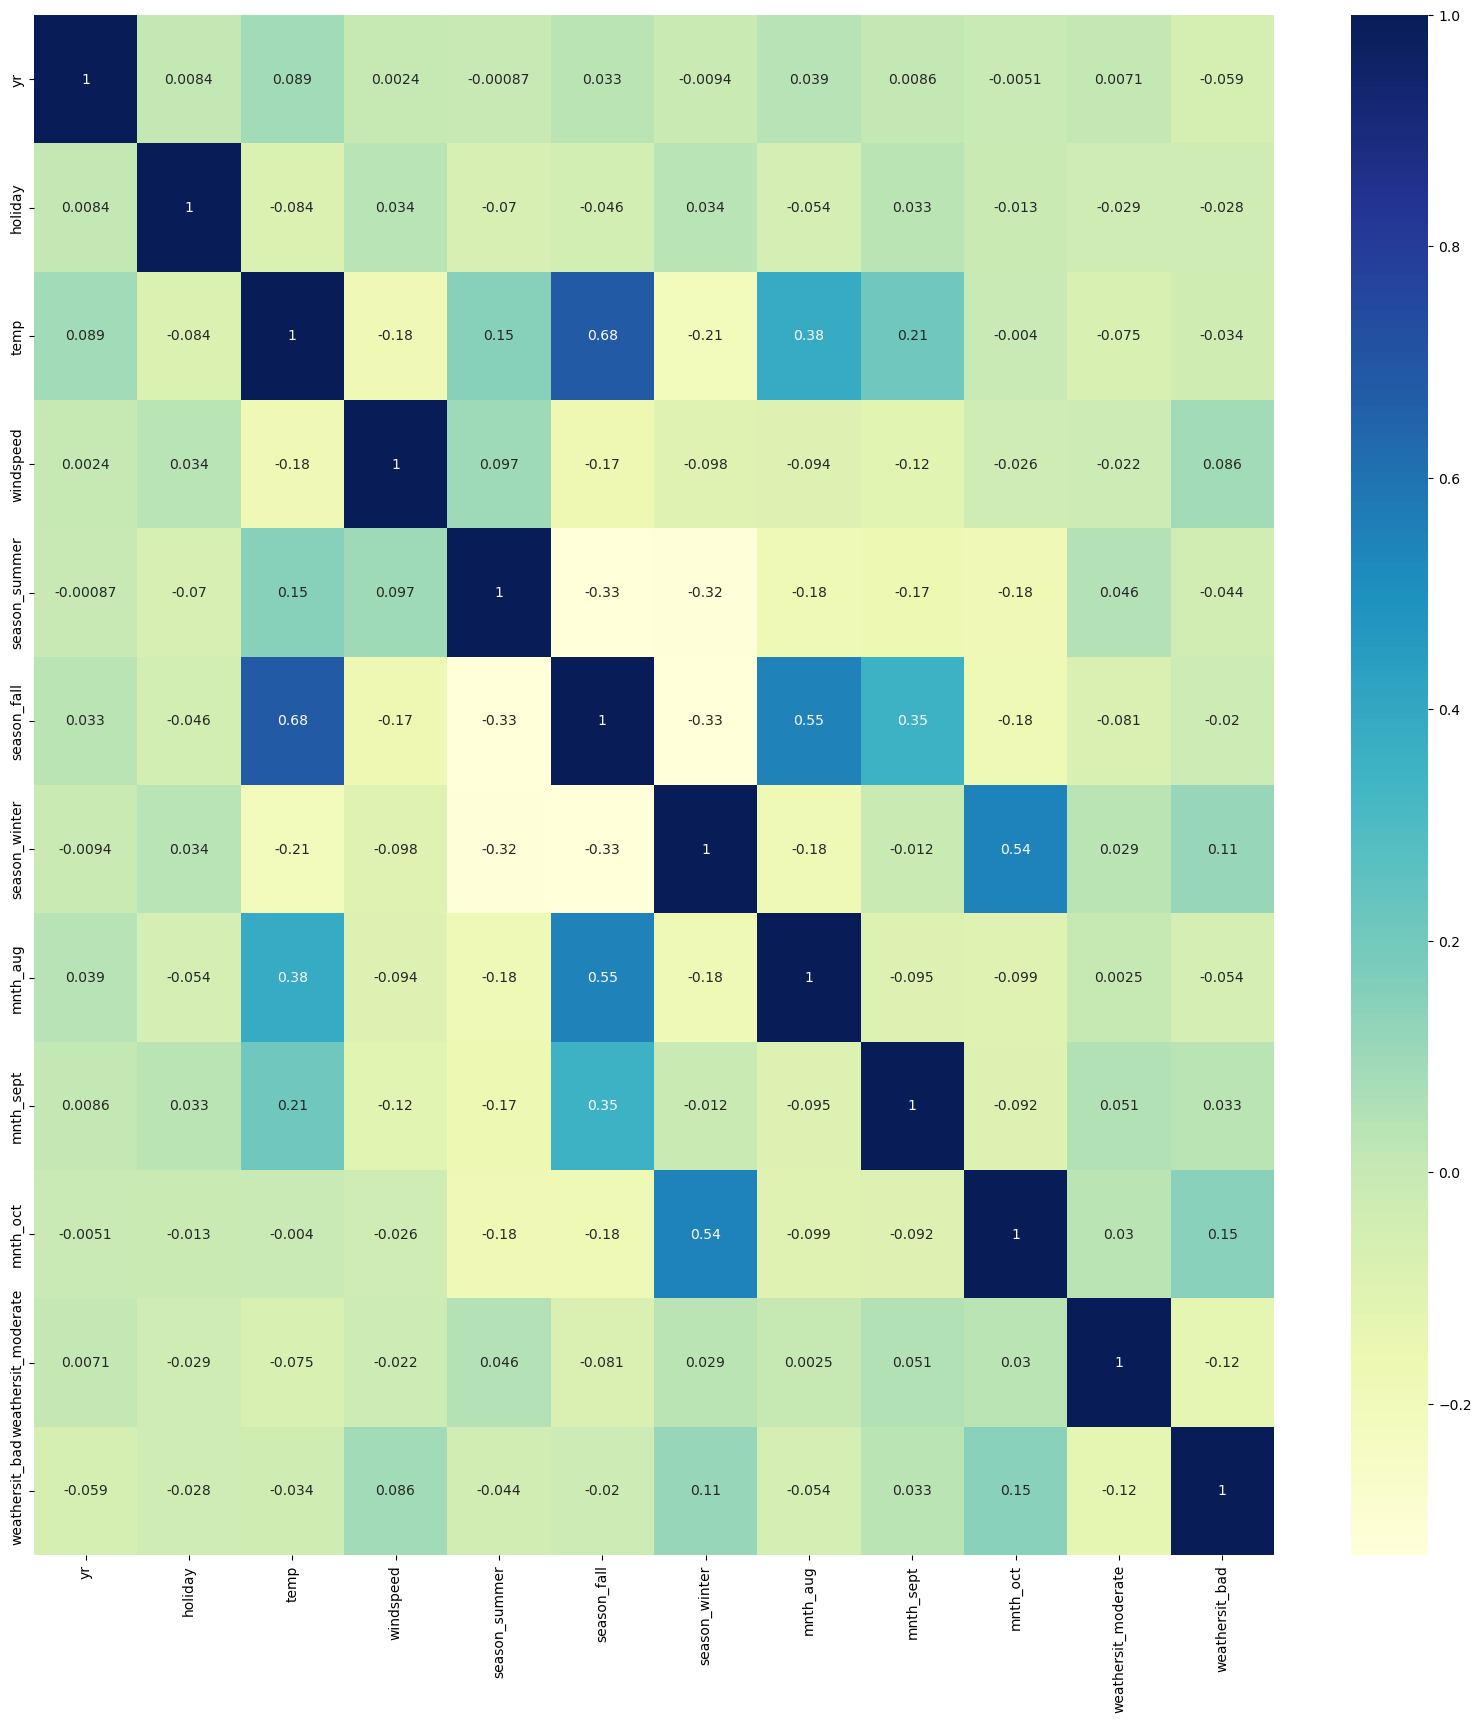

In [85]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [86]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

### 6. Model Prediction on Test Data

In [87]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [88]:
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,True,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,True,False,...,False,False,False,False,False,False,False,True,False,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,False,True,...,False,False,False,False,False,False,False,True,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,True,False,...,False,False,False,False,False,True,False,False,False,False


In [89]:
bike_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [90]:
# divie into x and y
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   183 non-null    int64  
 1   holiday              183 non-null    int64  
 2   workingday           183 non-null    int64  
 3   temp                 183 non-null    float64
 4   atemp                183 non-null    float64
 5   hum                  183 non-null    float64
 6   windspeed            183 non-null    float64
 7   season_summer        183 non-null    bool   
 8   season_fall          183 non-null    bool   
 9   season_winter        183 non-null    bool   
 10  mnth_feb             183 non-null    bool   
 11  mnth_mar             183 non-null    bool   
 12  mnth_apr             183 non-null    bool   
 13  mnth_may             183 non-null    bool   
 14  mnth_jun             183 non-null    bool   
 15  mnth_jul             183 non-null    bool  

In [91]:
X_test=X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                183 non-null    float64
 1   yr                   183 non-null    int64  
 2   holiday              183 non-null    int64  
 3   temp                 183 non-null    float64
 4   windspeed            183 non-null    float64
 5   season_summer        183 non-null    bool   
 6   season_fall          183 non-null    bool   
 7   season_winter        183 non-null    bool   
 8   mnth_aug             183 non-null    bool   
 9   mnth_sept            183 non-null    bool   
 10  mnth_oct             183 non-null    bool   
 11  weathersit_moderate  183 non-null    bool   
 12  weathersit_bad       183 non-null    bool   
dtypes: bool(8), float64(3), int64(2)
memory usage: 10.0 KB


In [92]:
y_test_pred = lr5.predict(X_test_lr5)


In [93]:
 lr5.params

const                  0.133781
yr                     0.233035
holiday               -0.110962
temp                   0.467146
windspeed             -0.143474
season_summer          0.126121
season_fall            0.044904
season_winter          0.144970
mnth_aug               0.044441
mnth_sept              0.109381
mnth_oct               0.043031
weathersit_moderate   -0.081844
weathersit_bad        -0.292904
dtype: float64

### 7. Generating R-Square

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7892149457090896

In [95]:
train_adjuested_r_2=0.841
train_r2=0.844

In [96]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.8329882352941176

In [97]:
# Train R-squire=0.844
# Test R-squire=0.7795
# Train Adj-R-squire=0.841
# Test Adj-R-squire=0.832
# That seems a very good models.